In [1]:
import pandas as pd
import numpy as np
import scipy #Anaconda prompt: conda install scipy, o pip install scipy
from scipy import stats
import matplotlib.pyplot as ppl
import seaborn as sns
%matplotlib inline

In [2]:
dis=pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/POB_PEN_INDIS_2020.txt', sep=';')
dis.dtypes

CEDULA                  object
ASEGURADO                int64
FECHA_INICIO_PENSION    object
TIPO_PRESTACION         object
FECHA_NACIMIENTO        object
FECHA_DEFUNCION         object
FECHA_FIN_PENSION       object
dtype: object

In [3]:
dis['ASEGURADO'] = dis['ASEGURADO'].astype(str)
dis = dis[dis['TIPO_PRESTACION'] == 'INVALIDEZ' ]
dis.head(5)

,CEDULA,ASEGURADO,FECHA_INICIO_PENSION,TIPO_PRESTACION,FECHA_NACIMIENTO,FECHA_DEFUNCION,FECHA_FIN_PENSION
0,%A%%EXXO%T,100744309,01/08/1996,INVALIDEZ,05/06/1930,NaN,30/06/2011
1,%A%AXATE&%,101419760,01/02/2015,INVALIDEZ,13/01/1956,NaN,31/07/2015
2,%A%AE%OEOX,101703734,01/08/2015,INVALIDEZ,29/04/1960,NaN,31/10/2015
3,%A%yX%X%Ty,102404092,01/01/2015,INVALIDEZ,15/06/1965,NaN,31/03/2015
5,%y%%yAE%#A,200217081,01/11/2011,INVALIDEZ,29/12/1950,11/10/2017,31/12/2011


In [4]:
mdict={str(x)[-2::]:x-100 for x in range(101,113)}
adict={str(x):x for x in range(1900,2021)}
dis['b_m']=dis['FECHA_NACIMIENTO'].str[3:5].map(mdict)
dis['b_y']=dis['FECHA_NACIMIENTO'].str[-4::].map(adict)
dis['d_m']=dis['FECHA_INICIO_PENSION'].str[3:5].map(mdict)
dis['d_y']=dis['FECHA_INICIO_PENSION'].str[-4::].map(adict)

In [5]:
dis=dis[dis['d_y']>2003]
dis['age_d']=dis['d_y']-dis['b_y']-1+(dis['b_m']<dis['d_m'])*1
dis.head(5)

,CEDULA,ASEGURADO,FECHA_INICIO_PENSION,TIPO_PRESTACION,FECHA_NACIMIENTO,FECHA_DEFUNCION,FECHA_FIN_PENSION,b_m,b_y,d_m,d_y,age_d
1,%A%AXATE&%,101419760,01/02/2015,INVALIDEZ,13/01/1956,NaN,31/07/2015,1.0,1956.0,2,2015.0,59.0
2,%A%AE%OEOX,101703734,01/08/2015,INVALIDEZ,29/04/1960,NaN,31/10/2015,4.0,1960.0,8,2015.0,55.0
3,%A%yX%X%Ty,102404092,01/01/2015,INVALIDEZ,15/06/1965,NaN,31/03/2015,6.0,1965.0,1,2015.0,49.0
5,%y%%yAE%#A,200217081,01/11/2011,INVALIDEZ,29/12/1950,11/10/2017,31/12/2011,12.0,1950.0,11,2011.0,60.0
7,%X%%XXTXAT,400449419,01/07/2013,INVALIDEZ,02/05/1952,11/05/2020,30/11/2013,5.0,1952.0,7,2013.0,61.0


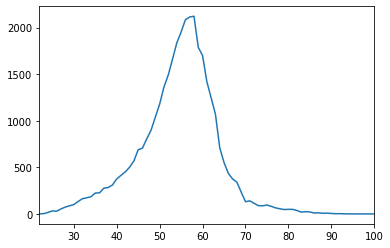

In [52]:
dis['age_d'].value_counts().sort_index().plot()

In [53]:
# act = pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/activos_edades_2021_2020_IVM.csv', sep=',',index_col=0,header=[0] )
act = pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/activos_edades_2021_2020_IVM_muestra.csv', sep=',',index_col=0,header=[0] )

In [54]:
act.head(5)

,CEDULA,2012_12,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,2020_3,2020_4,2020_5,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12
1,%#%%####&T,49,49,49,49,49,49,49,49,49,...,0,0,0,0,0,0,0,0,0,0
2,%#%%####@A,55,55,55,55,55,55,55,55,55,...,0,0,0,0,0,0,0,0,0,0
3,%#%%####A%,0,48,48,48,48,48,48,48,48,...,0,0,0,0,0,0,0,0,0,0
4,%#%%####O&,47,48,48,48,48,48,48,48,48,...,55,55,55,55,55,55,55,55,55,55
5,%#%%###%@T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
rel = []
for i in range(2013,2021):
    for j in range(1,13):
        rel.append( str(i)+ '_' + str(j) )

In [56]:
col_names = ['CEDULA'] + rel
act_m = act.loc[:,col_names]
act_m.head(5)

,CEDULA,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,2013_9,...,2020_3,2020_4,2020_5,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12
1,%#%%####&T,49,49,49,49,49,49,49,49,49,...,0,0,0,0,0,0,0,0,0,0
2,%#%%####@A,55,55,55,55,55,55,55,55,55,...,0,0,0,0,0,0,0,0,0,0
3,%#%%####A%,48,48,48,48,48,48,48,48,48,...,0,0,0,0,0,0,0,0,0,0
4,%#%%####O&,48,48,48,48,48,48,48,48,48,...,55,55,55,55,55,55,55,55,55,55
5,%#%%###%@T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
act_m1 = act_m.melt(id_vars = ['CEDULA'], var_name ='ANO_MES', value_name ='EDAD')
act_m1.head(5)

,CEDULA,ANO_MES,EDAD
0,%#%%####&T,2013_1,49
1,%#%%####@A,2013_1,55
2,%#%%####A%,2013_1,48
3,%#%%####O&,2013_1,48
4,%#%%###%@T,2013_1,0


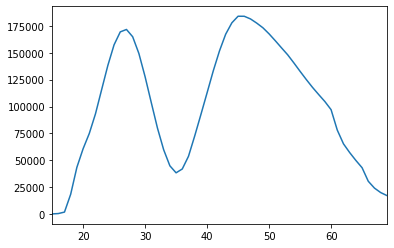

In [58]:
aux = pd.DataFrame( act_m1['EDAD'].value_counts().sort_index().loc[15:69] )
aux = aux[aux['EDAD']>1]
aux = aux['EDAD'].dropna()
aux.plot()

In [59]:
aux2 = dis['age_d'].dropna()

In [60]:
zt=scipy.stats.gaussian_kde(aux)
zd=scipy.stats.gaussian_kde(aux2)
dist_dis=pd.DataFrame(index=[i for i in range(14,70)],columns=['Total','dis'])
for i in dist_dis.index:
    dist_dis['Total'].loc[i]=zt.integrate_box_1d(14,i+1)
    dist_dis['dis'].loc[i]=zd.integrate_box_1d(14,i+1)


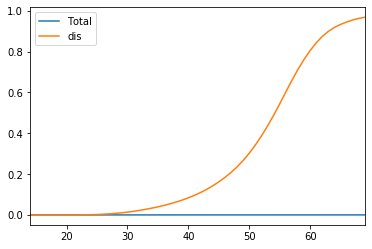

In [61]:
dist_dis.plot()

In [62]:
dist_dis=dist_dis.diff()/dist_dis.diff().sum()

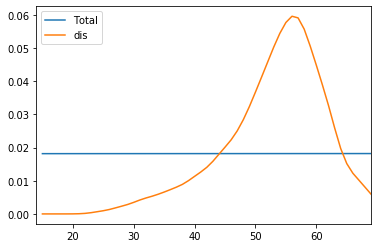

In [63]:
dist_dis.plot()

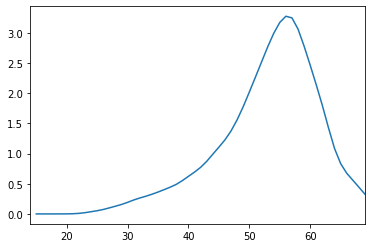

In [64]:
(dist_dis['dis']/dist_dis['Total']).plot()

In [ ]:
dist_dis_1 = pd.DataFrame(dist_dis['dis']/dist_dis['Total'])
dist_dis_1.to_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/dist_dis.csv')

In [65]:
dis_ir = pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/dist_dis.csv', sep=',',index_col=0,header=[0] )
dis_ir = pd.DataFrame( dis_ir)
dis_ir.rename(columns={'0':'Forma_P'},inplace=True)
dis_ir
dis_ir.head(5)

,Forma_P
14,NaN
15,5.123421e-13
16,2.368243e-10
17,3.839265e-08
18,2.226468e-06


In [66]:
ir_form = dis_ir
ir_form
pond =  0.00045
ir_form['pond'] = pond * ir_form
ir_form['pond_s'] = ir_form['pond'].shift(periods=1,fill_value=None)
ir_form['sum_acu'] = np.cumsum(ir_form['pond_s'])
ir_form['form'] = (1- ir_form['sum_acu'] )*ir_form['pond']
ir_form.loc[15,'form'] = ir_form.loc[15,'pond']
print( 'Porcentaje de discapacidad ' + str(ir_form['form'].fillna(0).sum() * 100)+'%')

Porcentaje de discapacidad 2.44563709616417%


In [ ]:
#Exportar 
ir_form.to_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/ir_form.csv')

In [6]:
# Se repite el proceso pero ahora por sexo ---------------------------------------------------------------------------------------
# Para Hombres
dis_m=pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/POB_PEN_INVDIS_2020.txt', sep=',')
dis_m.head(5)

,CEDULA,ASEGURADO,FECHA_INICIO_PENSION,TIPO_PRESTACION,FECHA_NACIMIENTO,FECHA_DEFUNCION,FECHA_FIN_PENSION,SEXO
0,%A%%%yOTXX,100023944,01/01/1981,INVALIDEZ,08/05/1917,18/09/2011,30/06/2011,M
1,%A%%%yXT@T,100024959,01/09/2013,INVALIDEZ,06/01/1947,NaN,31/10/2013,H
2,%A%%%yXT@T,100024959,01/09/2013,INVALIDEZ,06/01/1947,NaN,30/06/2017,H
3,%A%%%AA@&#,100011568,01/05/1982,INVALIDEZ,30/05/1932,NaN,30/06/2011,M
4,%A%%%yEyTA,100027291,01/05/1971,INVALIDEZ,18/04/1931,NaN,30/06/2011,M


In [7]:
dis_m['ASEGURADO'] = dis_m['ASEGURADO'].astype(str)
dis_m = dis_m[dis_m['TIPO_PRESTACION'] == 'INVALIDEZ' ]
dis_m = dis_m[dis_m['SEXO']=='H']
dis_m.head(5)

,CEDULA,ASEGURADO,FECHA_INICIO_PENSION,TIPO_PRESTACION,FECHA_NACIMIENTO,FECHA_DEFUNCION,FECHA_FIN_PENSION,SEXO
1,%A%%%yXT@T,100024959,01/09/2013,INVALIDEZ,06/01/1947,NaN,31/10/2013,H
2,%A%%%yXT@T,100024959,01/09/2013,INVALIDEZ,06/01/1947,NaN,30/06/2017,H
5,%A%%%yEO&&,100027366,01/05/1997,INVALIDEZ,22/08/1936,NaN,31/05/2011,H
7,%A%%%%AE%%,100001700,01/12/1975,INVALIDEZ,10/03/1933,NaN,31/05/2011,H
8,%A%%%AOTOE,100013937,18/09/1998,INVALIDEZ,29/01/1937,26/06/2014,30/06/2011,H


<AxesSubplot:>

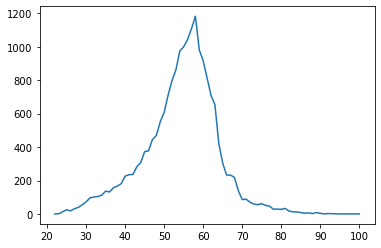

In [8]:
mdict={str(x)[-2::]:x-100 for x in range(101,113)}
adict={str(x):x for x in range(1900,2021)}
dis_m['b_m']=dis_m['FECHA_NACIMIENTO'].str[3:5].map(mdict)
dis_m['b_y']=dis_m['FECHA_NACIMIENTO'].str[-4::].map(adict)
dis_m['d_m']=dis_m['FECHA_INICIO_PENSION'].str[3:5].map(mdict)
dis_m['d_y']=dis_m['FECHA_INICIO_PENSION'].str[-4::].map(adict)
dis_m=dis_m[dis_m['d_y']>2003]
dis_m['age_d']=dis_m['d_y']-dis_m['b_y']-1+(dis_m['b_m']<dis_m['d_m'])*1
# dis_m.head(5)
dis_m['age_d'].value_counts().sort_index().plot()

In [20]:
#Para la población Masculina
act_m=pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/activos_edades_2021_2020_IVM_hombres.csv', sep=',', index_col=0,header=[0] )
#Para la muestra
# act_m1=pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/activos_edades_2021_2020_IVM_muestra_hombres.csv', sep=',',
#                 index_col=0,header=[0] )
act_m.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CEDULA,2012_12,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,2020_3,2020_4,2020_5,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12
1,%#%%####@A,55,55,55,55,55,55,55,55,55,...,0,0,0,0,0,0,0,0,0,0
2,%#%%####A%,0,48,48,48,48,48,48,48,48,...,0,0,0,0,0,0,0,0,0,0
3,%#%%####O&,47,48,48,48,48,48,48,48,48,...,55,55,55,55,55,55,55,55,55,55
4,%#%%###&#E,0,0,0,0,0,0,0,0,0,...,56,56,56,56,56,56,57,57,57,57
5,%#%%###&Ay,47,47,47,47,47,48,48,48,48,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

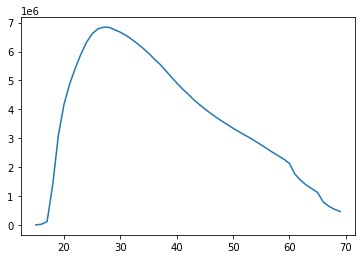

In [21]:
rel = []
for i in range(2013,2021):
    for j in range(1,13):
        rel.append( str(i)+ '_' + str(j) )

col_names = ['CEDULA'] + rel
act_m = act_m.loc[:,col_names]
act_m = act_m.melt(id_vars = ['CEDULA'], var_name ='ANO_MES', value_name ='EDAD')
aux = pd.DataFrame( act_m['EDAD'].value_counts().sort_index().loc[15:69] )
aux = aux[aux['EDAD']>1]
aux = aux['EDAD'].dropna()
aux.plot()

<AxesSubplot:>

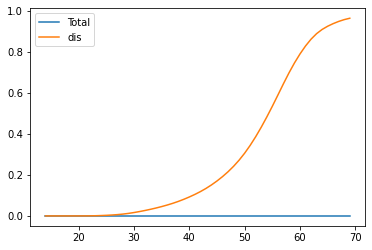

In [22]:
aux2 = dis_m['age_d'].dropna()
zt=scipy.stats.gaussian_kde(aux)
zd=scipy.stats.gaussian_kde(aux2)
dist_dis=pd.DataFrame(index=[i for i in range(14,70)],columns=['Total','dis'])
for i in dist_dis.index:
    dist_dis['Total'].loc[i]=zt.integrate_box_1d(14,i+1)
    dist_dis['dis'].loc[i]=zd.integrate_box_1d(14,i+1)

dist_dis.plot()

<AxesSubplot:>

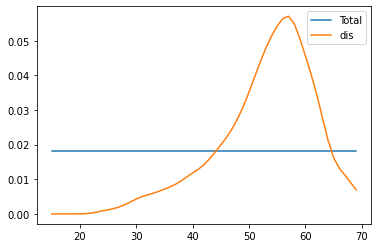

In [23]:
dist_dis=dist_dis.diff()/dist_dis.diff().sum()
dist_dis.plot()

<AxesSubplot:>

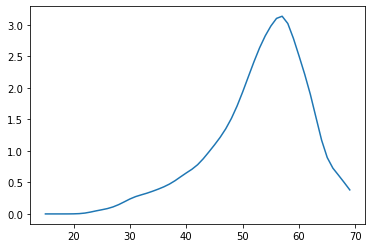

In [24]:
(dist_dis['dis']/dist_dis['Total']).plot()

In [25]:
dist_dis_1 = pd.DataFrame(dist_dis['dis']/dist_dis['Total'])
dist_dis_1.to_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/dist_dis_hombres.csv')

In [65]:
dis_ir = pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/dist_dis_hombres.csv', sep=',',index_col=0,header=[0] )
dis_ir = pd.DataFrame( dis_ir)
dis_ir.rename(columns={'0':'Forma_P'},inplace=True)
dis_ir.head(5)

,Forma_P
14,NaN
15,5.303015e-09
16,1.697648e-07
17,3.141340e-06
18,3.474966e-05


In [66]:
ir_form = dis_ir
ir_form
pond =  0.0009323
ir_form['pond'] = pond * ir_form
ir_form['pond_s'] = ir_form['pond'].shift(periods=1,fill_value=None)
ir_form['sum_acu'] = np.cumsum(ir_form['pond_s'])
ir_form['form'] = (1- ir_form['sum_acu'] )*ir_form['pond']
ir_form.loc[15,'form'] = ir_form.loc[15,'pond']
print( 'Porcentaje de discapacidad ' + str(ir_form['form'].fillna(0).sum() * 100)+'%')

Porcentaje de discapacidad 5.000927985992397%


In [28]:
ir_form

,Forma_P,pond,pond_s,sum_acu,form
14,NaN,NaN,NaN,NaN,NaN
15,5.303015e-09,1.956812e-12,NaN,NaN,1.956812e-12
16,1.697648e-07,6.264321e-11,1.956812e-12,1.956812e-12,6.264321e-11
17,3.141340e-06,1.159154e-09,6.264321e-11,6.460002e-11,1.159154e-09
18,3.474966e-05,1.282263e-08,1.159154e-09,1.223754e-09,1.282263e-08
19,2.448256e-04,9.034066e-08,1.282263e-08,1.404638e-08,9.034066e-08
20,1.210026e-03,4.464997e-07,9.034066e-08,1.043870e-07,4.464997e-07
21,4.572873e-03,1.687390e-06,4.464997e-07,5.508867e-07,1.687389e-06
22,1.337806e-02,4.936505e-06,1.687390e-06,2.238277e-06,4.936494e-06
23,2.932311e-02,1.082023e-05,4.936505e-06,7.174782e-06,1.082015e-05


In [32]:
ir_form.to_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/ir_form_hombres.csv',
                decimal= ",", sep=';', float_format='%.15f')

In [207]:
# Para Mujeres
dis_f=pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/POB_PEN_INVDIS_2020.txt', sep=',')
dis_f.head(5)

,CEDULA,ASEGURADO,FECHA_INICIO_PENSION,TIPO_PRESTACION,FECHA_NACIMIENTO,FECHA_DEFUNCION,FECHA_FIN_PENSION,SEXO
0,%A%%%yOTXX,100023944,01/01/1981,INVALIDEZ,08/05/1917,18/09/2011,30/06/2011,M
1,%A%%%yXT@T,100024959,01/09/2013,INVALIDEZ,06/01/1947,NaN,31/10/2013,H
2,%A%%%yXT@T,100024959,01/09/2013,INVALIDEZ,06/01/1947,NaN,30/06/2017,H
3,%A%%%AA@&#,100011568,01/05/1982,INVALIDEZ,30/05/1932,NaN,30/06/2011,M
4,%A%%%yEyTA,100027291,01/05/1971,INVALIDEZ,18/04/1931,NaN,30/06/2011,M


In [208]:
dis_f['ASEGURADO'] = dis_f['ASEGURADO'].astype(str)
dis_f = dis_f[dis_f['TIPO_PRESTACION'] == 'INVALIDEZ' ]
dis_f = dis_f[dis_f['SEXO']=='M']
dis_f.head(5)

,CEDULA,ASEGURADO,FECHA_INICIO_PENSION,TIPO_PRESTACION,FECHA_NACIMIENTO,FECHA_DEFUNCION,FECHA_FIN_PENSION,SEXO
0,%A%%%yOTXX,100023944,01/01/1981,INVALIDEZ,08/05/1917,18/09/2011,30/06/2011,M
3,%A%%%AA@&#,100011568,01/05/1982,INVALIDEZ,30/05/1932,NaN,30/06/2011,M
4,%A%%%yEyTA,100027291,01/05/1971,INVALIDEZ,18/04/1931,NaN,30/06/2011,M
6,%A%%%y#A%T,100028109,01/07/2001,INVALIDEZ,06/12/1942,NaN,31/05/2011,M
10,%A%%%A&T#T,100016989,01/07/2013,INVALIDEZ,17/10/1946,NaN,31/08/2013,M


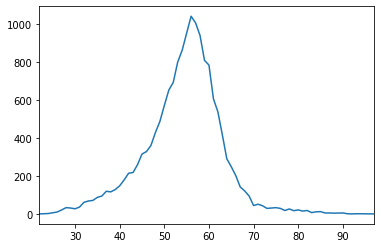

In [209]:
mdict={str(x)[-2::]:x-100 for x in range(101,113)}
adict={str(x):x for x in range(1900,2021)}
dis_f['b_m']=dis_f['FECHA_NACIMIENTO'].str[3:5].map(mdict)
dis_f['b_y']=dis_f['FECHA_NACIMIENTO'].str[-4::].map(adict)
dis_f['d_m']=dis_f['FECHA_INICIO_PENSION'].str[3:5].map(mdict)
dis_f['d_y']=dis_f['FECHA_INICIO_PENSION'].str[-4::].map(adict)
dis_f=dis_f[dis_f['d_y']>2003]
dis_f['age_d']=dis_f['d_y']-dis_f['b_y']-1+(dis_f['b_m']<dis_f['d_m'])*1
# dis_m.head(5)
dis_f['age_d'].value_counts().sort_index().plot()

In [210]:
#Para la población Femenina
# act_m=pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/activos_edades_2021_2020_IVM_mujeres.csv', sep=',',
#                 ,index_col=0,header=[0] )
#Para la muestra
act_f=pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/activos_edades_2021_2020_IVM_muestra_mujeres.csv', sep=',',
                   index_col=0,header=[0] )
act_f.head(5)

,CEDULA,2012_12,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,2020_3,2020_4,2020_5,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12
1,%#%%####&T,49,49,49,49,49,49,49,49,49,...,0,0,0,0,0,0,0,0,0,0
2,%#%%###%@T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,%#%%###&O#,0,46,46,46,46,46,46,46,46,...,0,0,0,0,0,0,0,0,0,0
4,%#%%###@OT,48,48,48,48,48,48,48,48,48,...,55,55,55,55,55,55,56,56,56,56
5,%#%%###AAE,49,49,49,49,49,49,49,49,49,...,56,56,56,56,56,56,56,56,57,57


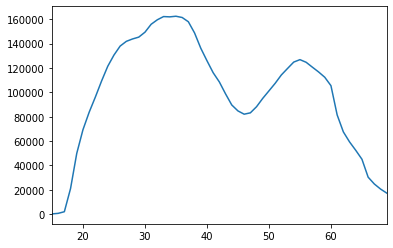

In [211]:
rel = []
for i in range(2013,2021):
    for j in range(1,13):
        rel.append( str(i)+ '_' + str(j) )

col_names = ['CEDULA'] + rel
act_f = act_f.loc[:,col_names]
act_f = act_f.melt(id_vars = ['CEDULA'], var_name ='ANO_MES', value_name ='EDAD')
aux = pd.DataFrame( act_f['EDAD'].value_counts().sort_index().loc[15:69] )
aux = aux[aux['EDAD']>1]
aux = aux['EDAD'].dropna()
aux.plot()

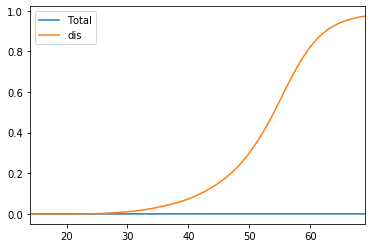

In [212]:
aux2 = dis_f['age_d'].dropna()
zt=scipy.stats.gaussian_kde(aux)
zd=scipy.stats.gaussian_kde(aux2)
dist_dis=pd.DataFrame(index=[i for i in range(14,70)],columns=['Total','dis'])
for i in dist_dis.index:
    dist_dis['Total'].loc[i]=zt.integrate_box_1d(14,i+1)
    dist_dis['dis'].loc[i]=zd.integrate_box_1d(14,i+1)

dist_dis.plot()

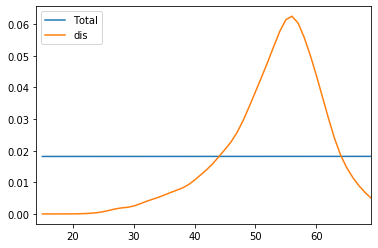

In [213]:
dist_dis=dist_dis.diff()/dist_dis.diff().sum()
dist_dis.plot()

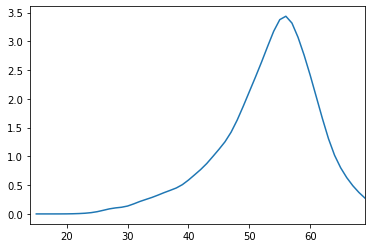

In [214]:
(dist_dis['dis']/dist_dis['Total']).plot()

In [215]:
dist_dis_1 = pd.DataFrame(dist_dis['dis']/dist_dis['Total'])
dist_dis_1.to_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/dist_dis_mujeres.csv')

In [63]:
dis_ir = pd.read_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/dist_dis_mujeres.csv', sep=',',index_col=0,header=[0] )
dis_ir = pd.DataFrame( dis_ir)
dis_ir.rename(columns={'0':'Forma_P'},inplace=True)
dis_ir.head(5)

,Forma_P
14,NaN
15,2.130783e-09
16,9.341042e-08
17,2.213088e-06
18,2.888907e-05


In [64]:
ir_form = dis_ir
ir_form
pond = 0.00074245
ir_form['pond'] = pond * ir_form
ir_form['pond_s'] = ir_form['pond'].shift(periods=1,fill_value=None)
ir_form['sum_acu'] = np.cumsum(ir_form['pond_s'])
ir_form['form'] = (1- ir_form['sum_acu'] )*ir_form['pond']
ir_form.loc[15,'form'] = ir_form.loc[15,'pond']
print( 'Porcentaje de discapacidad ' + str(ir_form['form'].fillna(0).sum() * 100)+'%')

Porcentaje de discapacidad 4.003345100380411%


In [57]:
ir_form

,Forma_P,pond,pond_s,sum_acu,form
14,NaN,NaN,NaN,NaN,NaN
15,2.130783e-09,7.841282e-13,NaN,NaN,7.841282e-13
16,9.341042e-08,3.437504e-11,7.841282e-13,7.841282e-13,3.437504e-11
17,2.213088e-06,8.144165e-10,3.437504e-11,3.515916e-11,8.144165e-10
18,2.888907e-05,1.063118e-08,8.144165e-10,8.495757e-10,1.063118e-08
19,2.145080e-04,7.893894e-08,1.063118e-08,1.148075e-08,7.893894e-08
20,9.556379e-04,3.516748e-07,7.893894e-08,9.041970e-08,3.516747e-07
21,2.792679e-03,1.027706e-06,3.516748e-07,4.420945e-07,1.027705e-06
22,6.141635e-03,2.260122e-06,1.027706e-06,1.469800e-06,2.260118e-06
23,1.186085e-02,4.364793e-06,2.260122e-06,3.729922e-06,4.364777e-06


In [26]:
ir_form.to_csv('Y:/IESS_2020/Data/IVM/INPUT/ESCENARIO_BASE/DEMOGRAPHIC/TRANSITION_PROBABILITIES/ir_form_mujeres.csv', 
               decimal= ",", sep=';', float_format='%.15f')